## Université Paris-Sud 
## Info 114 Introduction to Data Science -- Fall 2019
# Project 2: SEGMENTATION

In this project you will try to improve the data segmentation, that is better locate the fruits and crop them correctly. 

In [1]:
# Load general libraries
import os, re
from glob import glob as ls
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns; sns.set()
from PIL import Image
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings("ignore")
from sys import path

In [2]:
# Import the instructors' utilities
code_dir = '../utilities'
path.append(code_dir); 
from utilities import *
# ... and YOUR OWN functions (you will have to edit the file mycode.py)
from mycode import *

# Step 1: Loading data

In [3]:
data_dir = '../mini-dataset/raw_data/'
a_files = get_files(data_dir, 'a')
b_files = get_files(data_dir, 'b')
all_files = a_files+b_files

ORIGINAL IMAGES


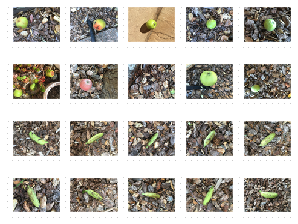

In [4]:
# Show a few images
some_a_files = a_files[0:10]
some_b_files = b_files[0:10]
some_files = some_a_files+some_b_files
print('ORIGINAL IMAGES')
show_images(some_files)

## Step 2: Cropping images
In `my_code.py` put a function that does a better job than the function `crop_image` found in `utilities`.

CROPPED IMAGES


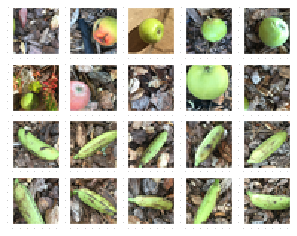

In [5]:
print('CROPPED IMAGES')
show_images(some_files, crop_image)

In [6]:
# uncomment this to show all images (slow)
#show_images(all_files, crop_image, columns = 15, show_num=True)

## Step3: Preprocessing the entire dataset

In [7]:
X, Y = preprocess_data(a_files, b_files, extract_cropped_image)
print(X.shape, Y.shape)

(491, 3072) (491, 1)


In [8]:
# Save the dataset
my_data_dir = './my_dataset/'
file_name = os.path.join(my_data_dir, 'CROP_data.csv') # Cropped data (pixels)
data_to_csv(X, Y, file_name=file_name)

,0,1,2,3,4,5,6,7,8,9,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,3072
0,103.0,101.0,88.0,48.0,44.0,38.0,148.0,135.0,128.0,146.0,...,115.0,113.0,121.0,120.0,120.0,131.0,151.0,151.0,162.0,1.0
1,149.0,131.0,121.0,121.0,103.0,88.0,130.0,127.0,123.0,178.0,...,126.0,143.0,160.0,179.0,185.0,187.0,142.0,148.0,147.0,1.0
2,216.0,184.0,140.0,217.0,186.0,142.0,217.0,186.0,141.0,217.0,...,208.0,165.0,112.0,196.0,157.0,108.0,175.0,138.0,94.0,1.0
3,116.0,129.0,150.0,120.0,128.0,142.0,136.0,143.0,146.0,123.0,...,88.0,77.0,66.0,61.0,52.0,47.0,24.0,19.0,17.0,1.0
4,195.0,176.0,143.0,183.0,169.0,132.0,70.0,67.0,61.0,52.0,...,55.0,51.0,37.0,62.0,67.0,62.0,107.0,120.0,127.0,1.0
5,78.0,49.0,26.0,76.0,48.0,26.0,95.0,62.0,35.0,110.0,...,112.0,134.0,36.0,154.0,130.0,64.0,171.0,142.0,115.0,1.0
6,182.0,182.0,184.0,176.0,183.0,190.0,43.0,45.0,45.0,5.0,...,84.0,69.0,50.0,86.0,85.0,77.0,93.0,95.0,90.0,1.0
7,78.0,72.0,71.0,92.0,79.0,75.0,66.0,48.0,43.0,79.0,...,127.0,115.0,103.0,99.0,92.0,87.0,177.0,156.0,144.0,1.0
8,73.0,67.0,57.0,89.0,84.0,75.0,73.0,73.0,67.0,85.0,...,94.0,91.0,84.0,17.0,14.0,8.0,74.0,73.0,71.0,1.0
9,68.0,57.0,48.0,64.0,47.0,35.0,109.0,93.0,76.0,74.0,...,173.0,154.0,129.0,154.0,121.0,91.0,130.0,101.0,69.0,1.0


## Step 3:  Baseline results
Reload the data and perform some tests.

In [9]:
df = pd.read_csv(os.path.join(my_data_dir, 'CROP_data.csv'))
df.head()

,0,1,2,3,4,5,6,7,8,9,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,3072
0,103.0,101.0,88.0,48.0,44.0,38.0,148.0,135.0,128.0,146.0,...,115.0,113.0,121.0,120.0,120.0,131.0,151.0,151.0,162.0,1.0
1,149.0,131.0,121.0,121.0,103.0,88.0,130.0,127.0,123.0,178.0,...,126.0,143.0,160.0,179.0,185.0,187.0,142.0,148.0,147.0,1.0
2,216.0,184.0,140.0,217.0,186.0,142.0,217.0,186.0,141.0,217.0,...,208.0,165.0,112.0,196.0,157.0,108.0,175.0,138.0,94.0,1.0
3,116.0,129.0,150.0,120.0,128.0,142.0,136.0,143.0,146.0,123.0,...,88.0,77.0,66.0,61.0,52.0,47.0,24.0,19.0,17.0,1.0
4,195.0,176.0,143.0,183.0,169.0,132.0,70.0,67.0,61.0,52.0,...,55.0,51.0,37.0,62.0,67.0,62.0,107.0,120.0,127.0,1.0


In [10]:
# Load nearest neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import balanced_accuracy_score as sklearn_metric
sklearn_model = KNeighborsClassifier(n_neighbors=3)

In [11]:
p_tr, s_tr, p_te, s_te = df_cross_validate(df, sklearn_model, sklearn_metric)
metric_name = sklearn_metric.__name__.upper()
print("AVERAGE TRAINING {0:s} +- STD: {1:.2f} +- {2:.2f}".format(metric_name, p_tr, s_tr))
print("AVERAGE TEST {0:s} +- STD: {1:.2f} +- {2:.2f}".format(metric_name, p_te, s_te))

AVERAGE TRAINING BALANCED_ACCURACY_SCORE +- STD: 0.83 +- 0.03
AVERAGE TEST BALANCED_ACCURACY_SCORE +- STD: 0.70 +- 0.03


List all the datasets you have created and the original one.

In [13]:
data_list = ls(my_data_dir + '*_data.csv')
check_datasets(data_list)

,Dataset,num. examples,num. features,num. apples,num. bananas
0,CROP,491,3073,333,158
1,ORIGINAL_CROP,491,3073,333,158


Compare your segmentation with the original one.

In [12]:
data_name = [os.path.basename(f)[:-9] for f in data_list]
all_data_df = [pd.read_csv(file) for file in data_list]
result = systematic_data_experiment(data_name, all_data_df, sklearn_model, sklearn_metric)
result.style.background_gradient(cmap='Blues')

KNEIGHBORSCLASSIFIER


,perf_tr,std_tr,perf_te,std_te
CROP,0.832763,0.0262211,0.699947,0.0278988
ORIGINAL_CROP,0.832763,0.0262211,0.699947,0.0278988


# Conclusion
Always end with some conclusion. What did you learn? What could be improved?

## ALWAYS TERMINATE YOUR WORK WITH "RESTART AND RUN ALL".